In [1]:
!pip install PyGithub

     |████████████████████████████████| 266kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
from github import Github

In [0]:
yd_token = 'INSERT_TOKEN'
github_yd = Github(yd_token)
repo = github_yd.get_repo('twbs/bootstrap')
pull_requests = repo.get_issues(state = 'closed')

In [0]:
events_list = []
for req_idx in range(pull_requests.totalCount):
  events_list.append(pull_requests[req_idx].get_events())


In [6]:
print(len(events_list))

29757


In [10]:
import time
smell_count = 0
for events in events_list:
  closed = False
  try:
    for event in events:
      if event.event == "closed":
        closed = True
      elif event.event == "reopened":
        closed = False
      elif closed and event.event == "merged":
        smell_count += 1
        break
  except Exception:
    time.sleep(3600)
    for event in events:
      if event.event == "closed":
        closed = True
      elif event.event == "reopened":
        closed = False
      elif closed and event.event == "merged":
        smell_count += 1
        break
    continue

print(smell_count)

14


<BarContainer object of 2 artists>

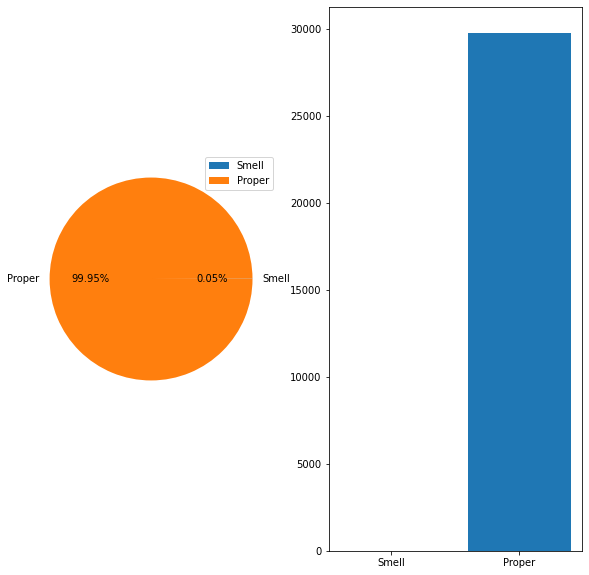

In [4]:
import matplotlib.pyplot as plt
smell_percentage = 100 * (smell_count / len(events_list))
data = [smell_percentage, 100 - smell_percentage]
label = ['Smell', 'Proper']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
ax1.pie(data, labels = label, autopct = '%1.2f%%')
ax1.legend()
ax2.bar(label, [smell_count, len(events_list) - smell_count])